In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.6
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_30_51_300_0.6_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_30_51_300_0.6_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	29278061.7608

Best Fitness:	11338569.8828
Solution:	100.0000
Diff:		11338469.8828

[0:24:07][----------] 1.96% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	23115430.4128

Best Fitness:	11524635.2974
Solution:	100.0000
Diff:		11524535.2974

[0:45:31][----------] 3.92% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	37759072.0862

Best Fitness:	14273099.1556
Solution:	100.0000
Diff:		14272999.1556

[1:06:58][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	18987413.9521

Best Fitness:	7905902.9826
Solution:	100.0000
Diff:		7905802.9826

[1:27:58][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	22394091.1383

Best Fitness:	8186845.0916
Solution:	100.0000
Diff:		8186745.0916

[1:48:02][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	18434846.1089

Best Fitness:	6439649.0729
Solution:	100.0000
Diff:		6439549.0729

[2:07:07][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	37250266.2833

Best Fitness:	14854294.1900
Solution:	100.0000
Diff:		14854194.1900

[2:27:24][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	27311832.3568

Best Fitness:	9798067.0229
Solution:	100.0000
Diff:		9797967.0229

[2:44:27][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	16911223.4388

Best Fitness:	6147196.9712
Solution:	100.0000
Diff:		6147096.9712

[3:01:20][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	30886976.5832

Best Fitness:	11645202.2207
Solution:	100.0000
Diff:		11645102.2207

[3:18:40][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	25167191.2081

Best Fitness:	12237386.2168
Solution:	100.0000
Diff:		12237286.2168

[3:34:30][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	23267638.2772

Best Fitness:	10394729.7556
Solution:	100.0000
Diff:		10394629.7556

[3:50:26][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	17903549.6936

Best Fitness:	9015710.0296
Solution:	100.0000
Diff:		9015610.0296

[4:05:57][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	55893834.7179

Best Fitness:	27019788.7376
Solution:	100.0000
Diff:		27019688.7376

[4:21:10][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	16132721.3965

Best Fitness:	7156676.8239
Solution:	100.0000
Diff:		7156576.8239

[4:37:26][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	16127585.2550

Best Fitness:	6402931.8973
Solution:	100.0000
Diff:		6402831.8973

[4:53:03][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	17079350.7164

Best Fitness:	8530786.7059
Solution:	100.0000
Diff:		8530686.7059

[5:06:57][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	13466478.2076

Best Fitness:	7287276.2960
Solution:	100.0000
Diff:		7287176.2960

[5:19:53][####------] 35.29% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	26338581.9573

Best Fitness:	10985974.4331
Solution:	100.0000
Diff:		10985874.4331

[5:31:43][####------] 37.25% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	18402725.6437

Best Fitness:	4404648.5615
Solution:	100.0000
Diff:		4404548.5615

[5:43:16][####------] 39.22% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	16372190.9792

Best Fitness:	7456427.7410
Solution:	100.0000
Diff:		7456327.7410

[5:54:43][####------] 41.18% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	13621325.3715

Best Fitness:	6549074.3987
Solution:	100.0000
Diff:		6548974.3987

[6:05:19][####------] 43.14% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	36056704.2080

Best Fitness:	13884116.3648
Solution:	100.0000
Diff:		13884016.3648

[6:15:50][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	12563189.7957

Best Fitness:	4139466.5288
Solution:	100.0000
Diff:		4139366.5288

[6:26:08][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	27512915.2554

Best Fitness:	13849320.4397
Solution:	100.0000
Diff:		13849220.4397

[6:35:38][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	37914316.1663

Best Fitness:	14308116.9032
Solution:	100.0000
Diff:		14308016.9032

[6:44:06][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	20821947.9251

Best Fitness:	9477892.8919
Solution:	100.0000
Diff:		9477792.8919

[6:52:17][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	36124969.4196

Best Fitness:	15829727.6872
Solution:	100.0000
Diff:		15829627.6872

[6:59:43][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	37896249.7975

Best Fitness:	15580953.5139
Solution:	100.0000
Diff:		15580853.5139

[7:07:09][######----] 56.86% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	18378631.6305

Best Fitness:	7831659.1859
Solution:	100.0000
Diff:		7831559.1859

[7:14:33][######----] 58.82% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	21822353.5855

Best Fitness:	10707696.5373
Solution:	100.0000
Diff:		10707596.5373

[7:21:56][######----] 60.78% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	30069547.3641

Best Fitness:	12005380.9747
Solution:	100.0000
Diff:		12005280.9747

[7:29:21][######----] 62.75% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	22002712.8182

Best Fitness:	10400727.5085
Solution:	100.0000
Diff:		10400627.5085

[7:36:44][######----] 64.71% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	16568628.1455

Best Fitness:	8818778.9400
Solution:	100.0000
Diff:		8818678.9400

[7:43:58][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	15266242.8348

Best Fitness:	7660256.6968
Solution:	100.0000
Diff:		7660156.6968

[7:50:27][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	24842441.6551

Best Fitness:	9450375.0387
Solution:	100.0000
Diff:		9450275.0387

[7:56:55][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	27126073.7504

Best Fitness:	11096699.7972
Solution:	100.0000
Diff:		11096599.7972

[8:03:20][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	22725254.1563

Best Fitness:	9913444.3438
Solution:	100.0000
Diff:		9913344.3438

[8:09:46][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	15250740.5349

Best Fitness:	7496541.4288
Solution:	100.0000
Diff:		7496441.4288

[8:16:11][########--] 76.47% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	18219130.7577

Best Fitness:	9955535.1536
Solution:	100.0000
Diff:		9955435.1536

[8:22:38][########--] 78.43% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	40121746.8301

Best Fitness:	19483777.4416
Solution:	100.0000
Diff:		19483677.4416

[8:29:04][########--] 80.39% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	26757894.6448

Best Fitness:	12758935.4577
Solution:	100.0000
Diff:		12758835.4577

[8:35:31][########--] 82.35% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	20271738.4447

Best Fitness:	8551680.1987
Solution:	100.0000
Diff:		8551580.1987

[8:41:24][########--] 84.31% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	11190835.4958

Best Fitness:	3601126.8626
Solution:	100.0000
Diff:		3601026.8626

[8:47:14][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	23758962.8222

Best Fitness:	12073899.2648
Solution:	100.0000
Diff:		12073799.2648

[8:52:59][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	19056542.5431

Best Fitness:	5842088.7294
Solution:	100.0000
Diff:		5841988.7294

[8:58:43][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	22792958.6910

Best Fitness:	9096095.3967
Solution:	100.0000
Diff:		9095995.3967

[9:04:29][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	22348804.1862

Best Fitness:	9228986.6070
Solution:	100.0000
Diff:		9228886.6070

[9:10:15][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	25009227.4193

Best Fitness:	10386060.7577
Solution:	100.0000
Diff:		10385960.7577

[9:16:05][##########] 96.08% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	28220152.3083

Best Fitness:	10480031.4462
Solution:	100.0000
Diff:		10479931.4462

[9:21:50][##########] 98.04% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	29082002.3554

Best Fitness:	9890792.5792
Solution:	100.0000
Diff:		9890692.5792

[9:28:23][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

9:28:23

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
592,3.443280e+07,3.206015e+07,3.185879e+07,2.699587e+07,2.597596e+07,2.509804e+07,2.697937e+07,4.192180e+07,4.293645e+07,2.188945e+07,...,3.799941e+07,3.113851e+07,3.859715e+07,1.824662e+07,2.663433e+07,3.197311e+07,2.601489e+07,1.810432e+07,3.784608e+07,50
593,3.443280e+07,3.206015e+07,3.185879e+07,2.177419e+07,2.597596e+07,2.509804e+07,2.697937e+07,4.192180e+07,4.293645e+07,2.188945e+07,...,3.799941e+07,3.113851e+07,3.859715e+07,1.824662e+07,2.663433e+07,3.197311e+07,2.601489e+07,1.810432e+07,3.784608e+07,50
594,3.443280e+07,3.206015e+07,3.185879e+07,2.177419e+07,2.597596e+07,2.509804e+07,2.697937e+07,4.192180e+07,4.293645e+07,2.188945e+07,...,3.799941e+07,3.113851e+07,3.859715e+07,1.824662e+07,2.663433e+07,3.197311e+07,2.601489e+07,1.810432e+07,3.784608e+07,50
595,3.443280e+07,3.206015e+07,3.185879e+07,2.177419e+07,2.597596e+07,2.509804e+07,2.697937e+07,4.192180e+07,4.293645e+07,2.188945e+07,...,3.799941e+07,3.113851e+07,3.859715e+07,1.824662e+07,2.663433e+07,3.197311e+07,2.601489e+07,1.810432e+07,3.784608e+07,50
596,3.443280e+07,3.206015e+07,3.185879e+07,2.177419e+07,2.597596e+07,2.509804e+07,2.697937e+07,4.192180e+07,4.293645e+07,2.188945e+07,...,3.799941e+07,3.113851e+07,3.859715e+07,1.824662e+07,2.663433e+07,3.197311e+07,2.601489e+07,1.810432e+07,3.784608e+07,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 11338469.882826896

Best error for run 1: 11524535.297361325

Best error for run 2: 14272999.155584093

Best error for run 3: 7905802.982611663

Best error for run 4: 8186745.091568708

Best error for run 5: 6439549.072861427

Best error for run 6: 14854194.189998293

Best error for run 7: 9797967.022926636

Best error for run 8: 6147096.971238243

Best error for run 9: 11645102.220651776

Best error for run 10: 12237286.216771772

Best error for run 11: 10394629.755553676

Best error for run 12: 9015610.029600322

Best error for run 13: 27019688.737551954

Best error for run 14: 7156576.823928334

Best error for run 15: 6402831.897334481

Best error for run 16: 8530686.705875827

Best error for run 17: 7287176.296027106

Best error for run 18: 10985874.433125444

Best error for run 19: 4404548.561549607

Best error for run 20: 7456327.740960163

Best error for run 21: 6548974.398705795

Best error for run 22: 13884016.364847671

Best error for run 23: 4139366.5288423845

Best error for run 24: 13849220.439658538

Best error for run 25: 14308016.903192518

Best error for run 26: 9477792.89191452

Best error for run 27: 15829627.687231896

Best error for run 28: 15580853.513907706

Best error for run 29: 7831559.185859961

Best error for run 30: 10707596.537304336

Best error for run 31: 12005280.974713678

Best error for run 32: 10400627.508520462

Best error for run 33: 8818678.93995961

Best error for run 34: 7660156.696837282

Best error for run 35: 9450275.038688004

Best error for run 36: 11096599.797239976

Best error for run 37: 9913344.343796194

Best error for run 38: 7496441.42877052

Best error for run 39: 9955435.153592259

Best error for run 40: 19483677.44161363

Best error for run 41: 12758835.457722057

Best error for run 42: 8551580.198682068

Best error for run 43: 3601026.8625955833

Best error for run 44: 12073799.264816929

Best error for run 45: 5841988.729448434

Best error for run 46: 9095995.396716995

Best error for run 47: 9228886.606999094

Best error for run 48: 10385960.757668504

Best error for run 49: 10479931.44617914

Best error for run 50: 9890692.579226734

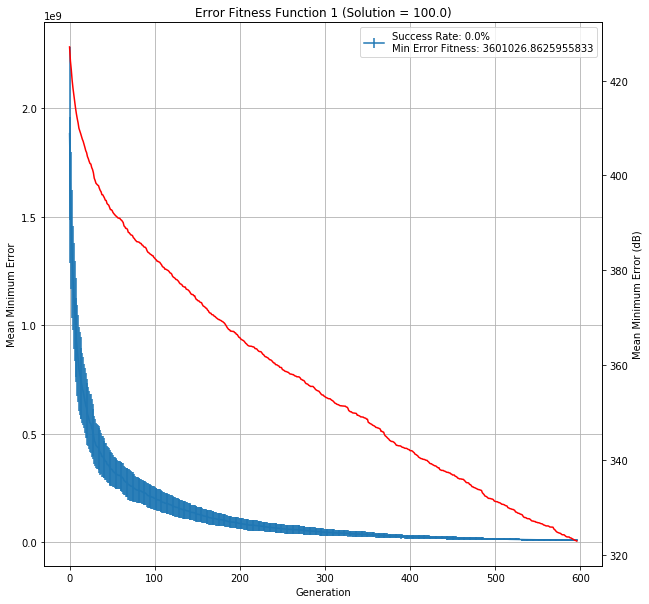

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_30_51_300_0.6_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,30,0.6,1.133847e+07,1.152454e+07,1.427300e+07,7.905803e+06,8.186745e+06,6.439549e+06,...,1.207380e+07,5.841989e+06,9.095995e+06,9.228887e+06,1.038596e+07,1.047993e+07,9.890693e+06,1.026176e+07,9:28:23,179700
